In [67]:
import pandas as pd
from matplotlib import pyplot as mp
import numpy as np
import statistics
from math import sqrt

grid_color = "grey"
label_color = "black"
plot_color="green"
title_fontsize = 30
axes_fontsize = 15
legend_fontsize = 17
text_pad = 30
context = {'axes.edgecolor':'grey',
           'axes.facecolor':'white',
           'font.family':'sans-serif', 
           'figure.facecolor':'white', 
           'figure.edgecolor':'white',
           'xtick.color':'black', 
           'ytick.color':'black', 
           'savefig.transparent':'True'}

grt_theoretical = 673.2178
grt_qos = 900
ploss_theoretical = 0.02519
ploss_qos = 0.05

EXTENDED = True
MIGLIORATIVO_1 = False
MIGLIORATIVO_2_POL_1 = False
MIGLIORATIVO_2_POL_2 = True

def cumMean(values, ubound):
    mean = 0
    for i in range(0, ubound):
        mean += values[i]
    return (mean / ubound)

def cumMeanArray(values):
    a = []
    for i in range(1, len(values)+1):
        mean = cumMean(values, i)
        a.append(mean)
    return a

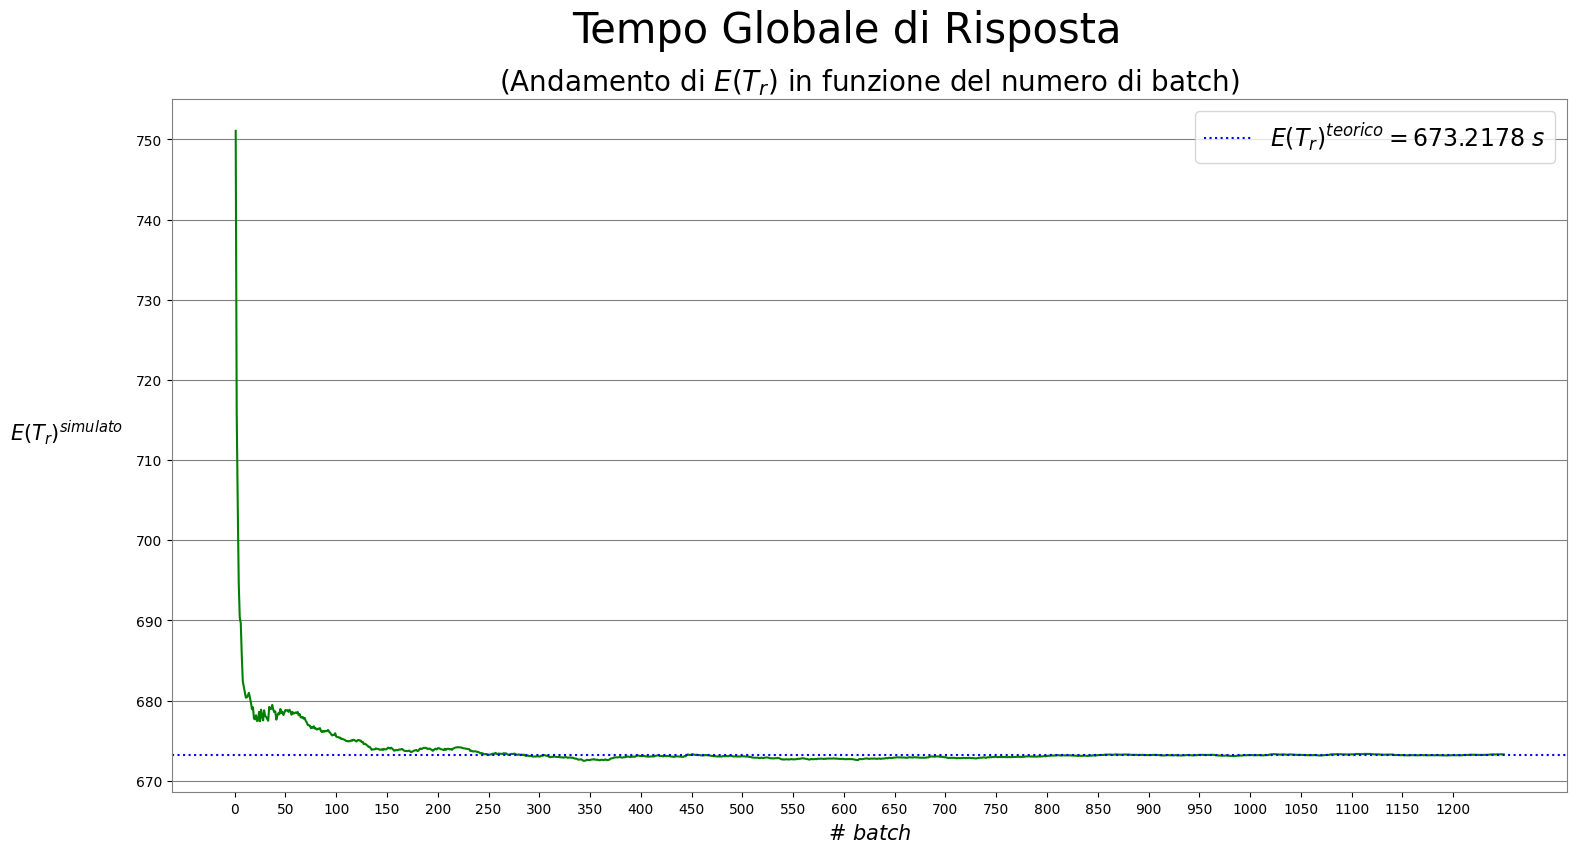

In [49]:
# This block is used to plot the grt's statistic in the infinite simulation.

def plot_infinite_grt():

    df = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_123456789.csv")    
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        values = pd.DataFrame(cumMeanArray(df.loc[:,'grt']))
        
        mp.plot(df.loc[:,'batch'], values, color=plot_color)
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$E(T_{r})$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ batch$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df.loc[:,'batch'][0])
        end = int(df.loc[:,'batch'][len(df)-1])
        
        mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = " + str(grt_theoretical) + "\ s$")
        
        mp.xticks(ticks=range(start-1, end, 50))
        
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_infinite_batch.svg')
        
        mp.show()

plot_infinite_grt()

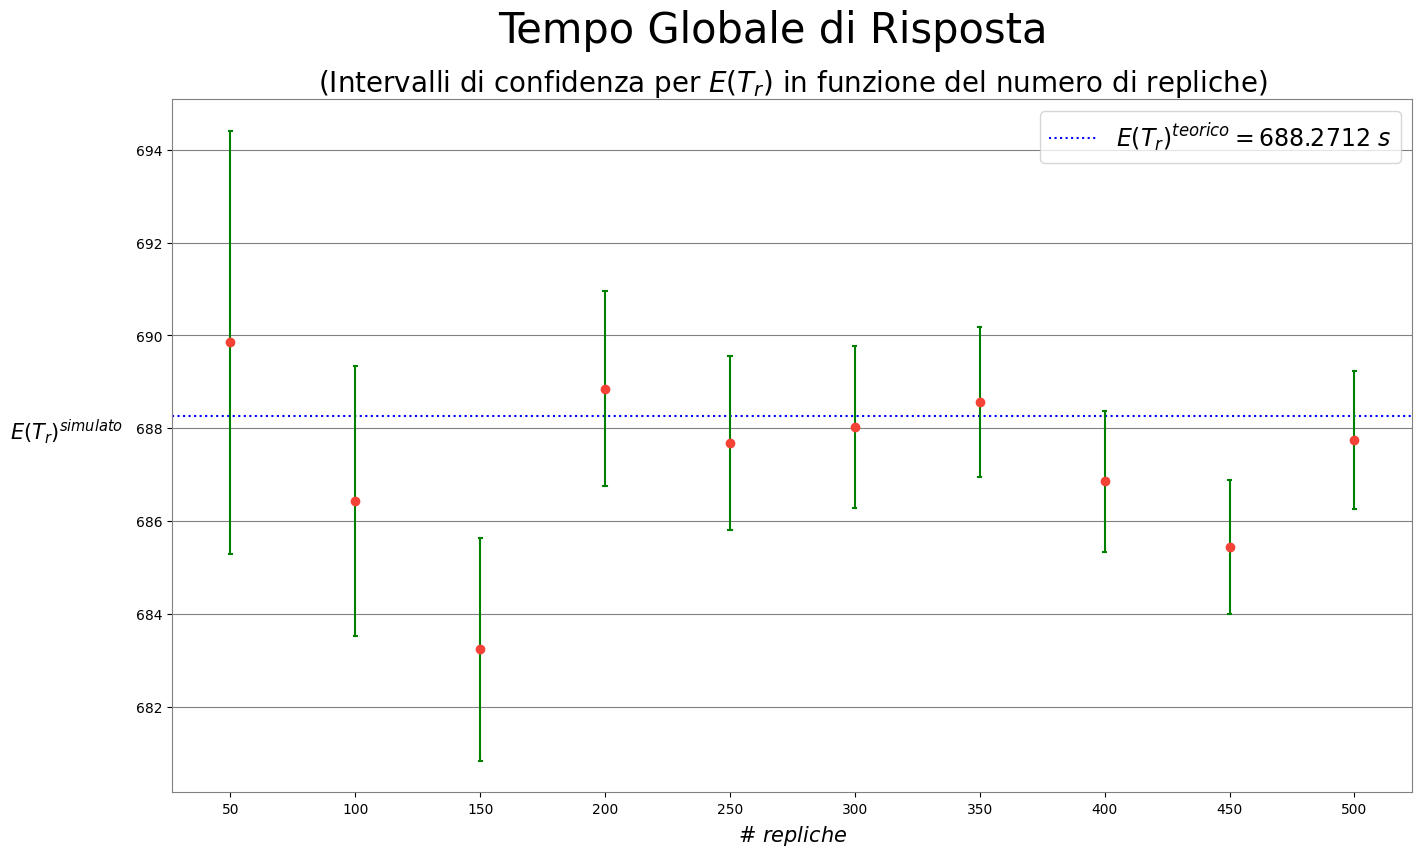

In [68]:
# This block is used to plot (and compute) the estimate intervals for the global response time's statistic in the finite simulation.

if not EXTENDED:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_50.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_100.csv") 
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_150.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_200.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_250.csv") 
    df6 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_300.csv")
    df7 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_350.csv")
    df8 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_400.csv") 
    df9 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_450.csv")
    df10 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_500.csv")
if EXTENDED and MIGLIORATIVO_1:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_50.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_100.csv") 
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_150.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_200.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_250.csv") 
    df6 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_300.csv")
    df7 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_350.csv")
    df8 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_400.csv") 
    df9 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_450.csv")
    df10 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_200_500.csv")
if EXTENDED and MIGLIORATIVO_2_POL_1:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_50.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_100.csv") 
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_150.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_200.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_250.csv") 
    df6 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_300.csv")
    df7 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_350.csv")
    df8 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_400.csv") 
    df9 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_450.csv")
    df10 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m21_500.csv")
if EXTENDED and MIGLIORATIVO_2_POL_2:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_50.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_100.csv") 
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_150.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_200.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_250.csv") 
    df6 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_300.csv")
    df7 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_350.csv")
    df8 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_400.csv") 
    df9 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_450.csv")
    df10 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ext_grt_m22_500.csv")
        
dfList = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

def plot_confidence_interval_grt(z=1.96, color='#2187bb', horizontal_line_width=0.25):
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(16,9))
        
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Intervalli di confidenza per "+ r"$E(T_{r})$" + " in funzione del numero di repliche)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ repliche$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        if not EXTENDED:
            mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = " + str(grt_theoretical) + "\ s$")
        if EXTENDED and MIGLIORATIVO_1:
            mp.axhline(y = 688.3362, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 688.3362\ s$")
        if (EXTENDED and MIGLIORATIVO_2_POL_1) or (EXTENDED and MIGLIORATIVO_2_POL_2):
            mp.axhline(y = 688.2712, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 688.2712\ s$")
            
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
        
    for i in range(len(dfList)):
        
        x = i+1
        values = dfList[i].loc[:,'grt']
        
        mean = statistics.mean(values)
        stdev = statistics.stdev(values)
        confidence_interval = z * stdev / sqrt(len(values))

        left = x - horizontal_line_width / 20
        top = mean - confidence_interval
        right = x + horizontal_line_width / 20
        bottom = mean + confidence_interval

        mp.plot([x, x], [top, bottom], color=plot_color)
        mp.plot([left, right], [top, top], color=plot_color)
        mp.plot([left, right], [bottom, bottom], color=plot_color)
        mp.plot(x, mean, 'o', color='#f44336')

    if not EXTENDED:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_finite_replicas.svg')
    if EXTENDED and MIGLIORATIVO_1:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_finite_200_replicas.svg')
    if EXTENDED and MIGLIORATIVO_2_POL_1:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_finite_m21_replicas.svg')        
    if EXTENDED and MIGLIORATIVO_2_POL_2:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_finite_m22_replicas.svg')
        
    mp.show()
     
plot_confidence_interval_grt()

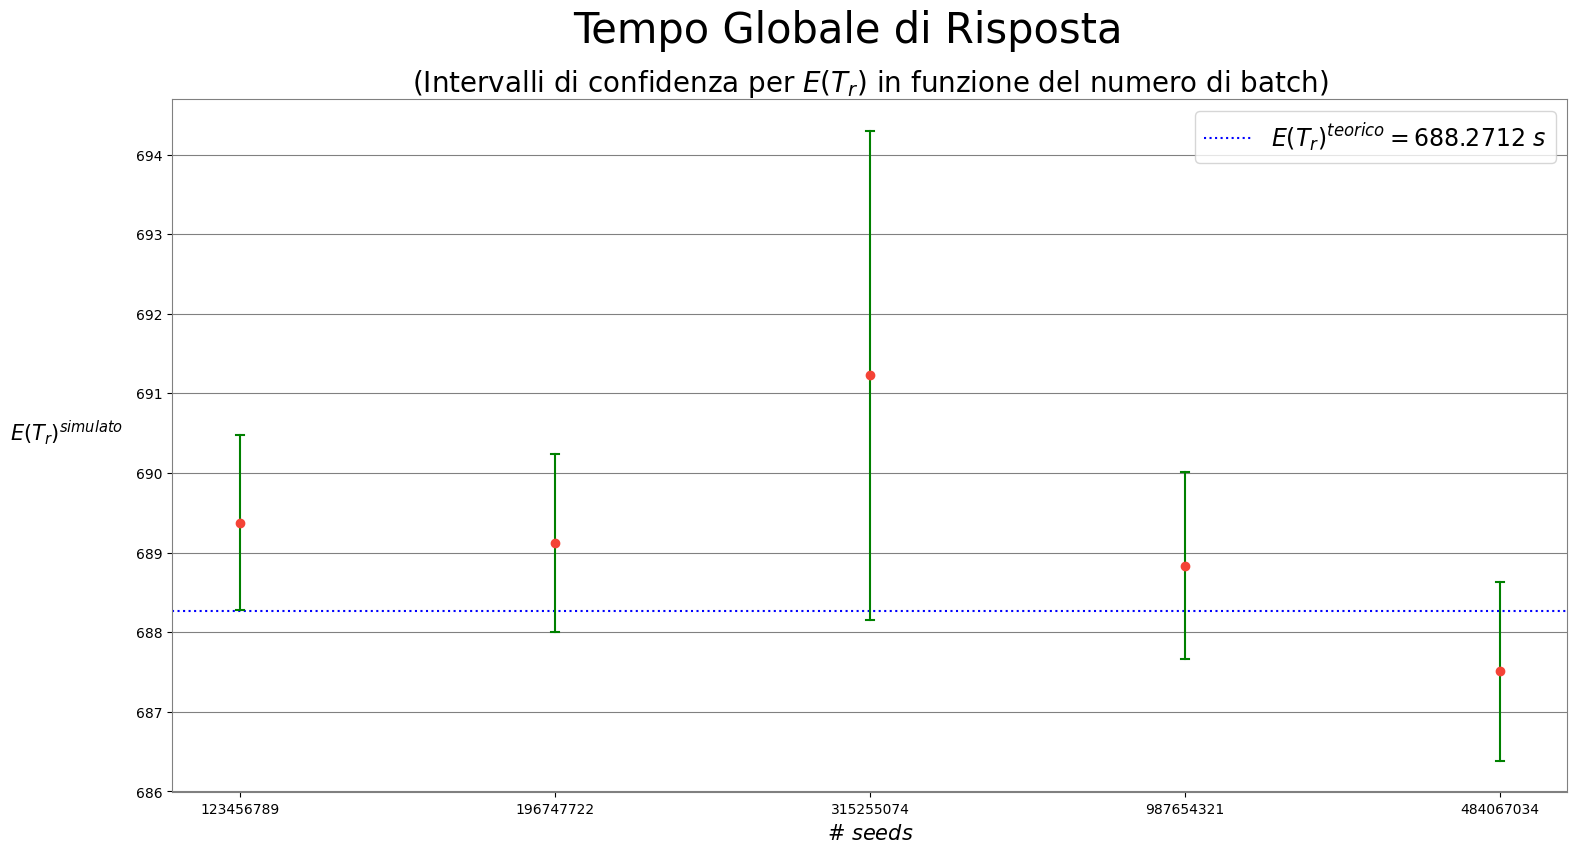

In [69]:
# This block is used to plot (and compute) the estimate intervals for the global response time's statistic in the infinite simulation
# varying the seed.

if not EXTENDED:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_484067034.csv")
if EXTENDED and MIGLIORATIVO_1:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_200_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_200_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_200_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_200_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_200_484067034.csv")
if EXTENDED and MIGLIORATIVO_2_POL_1:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m21_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m21_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m21_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m21_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m21_484067034.csv")
if EXTENDED and MIGLIORATIVO_2_POL_2:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m22_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m22_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m22_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m22_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m22_484067034.csv")

dfList = [df1, df2, df3, df4, df5]

def plot_confidence_interval_seed_grt(z=1.96, color='#2187bb', horizontal_line_width=0.25):
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Intervalli di confidenza per "+ r"$E(T_{r})$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ seeds$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        if not EXTENDED:
            mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = " + str(grt_theoretical) + "\ s$")
        if EXTENDED and MIGLIORATIVO_1:
            mp.axhline(y = 688.3362, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 688.3362\ s$")
        if (EXTENDED and MIGLIORATIVO_2_POL_1) or (EXTENDED and MIGLIORATIVO_2_POL_2):
            mp.axhline(y = 688.2712, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 688.2712\ s$")
            
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.xticks([1, 2, 3, 4, 5], [123456789, 196747722, 315255074, 987654321, 484067034])
        
    for i in range(len(dfList)):
        
        x = i+1
        values = dfList[i].loc[:,'grt']
        
        mean = statistics.mean(values)
        stdev = statistics.stdev(values)
        confidence_interval = z * stdev / sqrt(len(values))

        left = x - horizontal_line_width / 20
        top = mean - confidence_interval
        right = x + horizontal_line_width / 20
        bottom = mean + confidence_interval

        mp.plot([x, x], [top, bottom], color=plot_color)
        mp.plot([left, right], [top, top], color=plot_color)
        mp.plot([left, right], [bottom, bottom], color=plot_color)
        mp.plot(x, mean, 'o', color='#f44336')

    if not EXTENDED:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_seed_infinite.svg')
    if EXTENDED and MIGLIORATIVO_1:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_seed_infinite_200.svg')
    if EXTENDED and MIGLIORATIVO_2_POL_1:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_seed_infinite_m21.svg')        
    if EXTENDED and MIGLIORATIVO_2_POL_2:
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_seed_infinite_m22.svg')
                
    mp.show()
     
plot_confidence_interval_seed_grt()

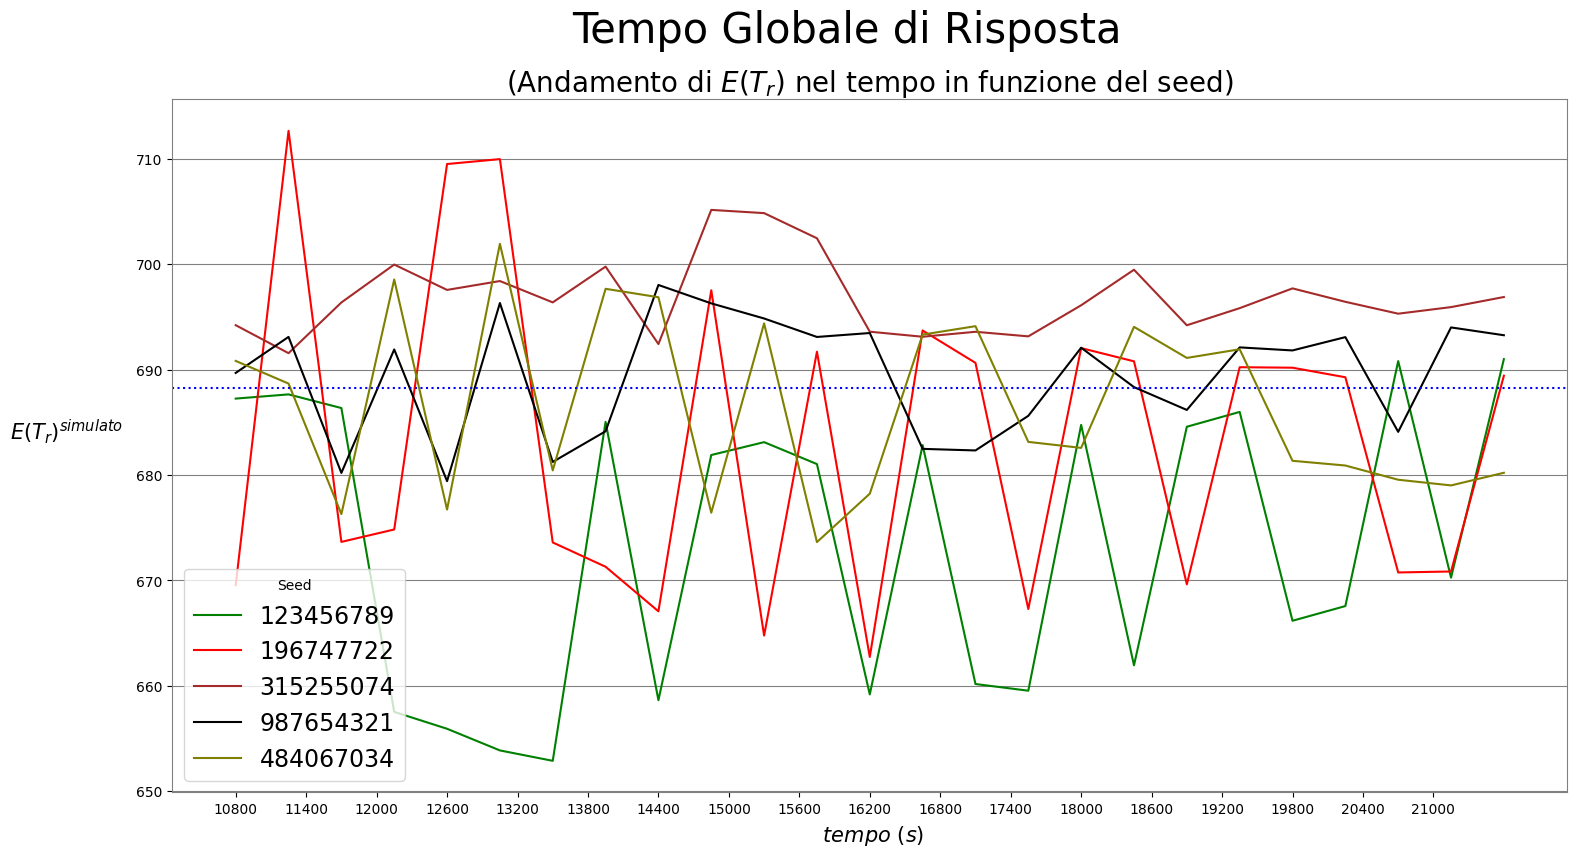

In [71]:
# This block is used to plot the global response time by varying the seed in the finite simulation.

if not EXTENDED:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_484067034.csv")
if EXTENDED and MIGLIORATIVO_1:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_200_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_200_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_200_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_200_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_200_484067034.csv")
if EXTENDED and MIGLIORATIVO_2_POL_1:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m21_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m21_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m21_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m21_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m21_484067034.csv")
if EXTENDED and MIGLIORATIVO_2_POL_2:
    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m22_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m22_196747722.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m22_315255074.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m22_987654321.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ext_grt_m22_484067034.csv")
    
def plot_seed_grt():
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
                
        mp.plot(df1.loc[:,'period'], df1.loc[:,'grt'], color=plot_color, label = "123456789")
        mp.plot(df2.loc[:,'period'], df2.loc[:,'grt'], color='red', label = "196747722")
        mp.plot(df3.loc[:,'period'], df3.loc[:,'grt'], color='brown', label = "315255074")
        mp.plot(df4.loc[:,'period'], df4.loc[:,'grt'], color="black", label = "987654321")
        mp.plot(df5.loc[:,'period'], df5.loc[:,'grt'], color='olive', label = "484067034")
        
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$E(T_{r})$" + " nel tempo in funzione del seed)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\ tempo\ (s)$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df1.loc[:,'period'][0])
        end = int(df1.loc[:,'period'][len(df1)-1])
        
        if not EXTENDED:
            mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':')#, label = r"$E(T_{r})^{teorico} = " + str(grt_theoretical) + "\ s$")
        if EXTENDED and MIGLIORATIVO_1:
            mp.axhline(y = 688.3362, color = 'b', linestyle = ':')#, label = r"$E(T_{r})^{teorico} = 688.3362\ s$")
        if (EXTENDED and MIGLIORATIVO_2_POL_1) or (EXTENDED and MIGLIORATIVO_2_POL_2):
            mp.axhline(y = 688.2712, color = 'b', linestyle = ':')#, label = r"$E(T_{r})^{teorico} = 688.2712\ s$")
      
        mp.xticks(ticks=range(start, end, 600))
        
        legend = mp.legend(fontsize=legend_fontsize, title = "Seed")
        mp.setp(legend.get_texts(), color=label_color)
        
        if not EXTENDED:
            mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_seed_finite.svg')
        if EXTENDED and MIGLIORATIVO_1:
            mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_seed_finite_200.svg')
        if EXTENDED and MIGLIORATIVO_2_POL_1:
            mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_seed_finite_m21.svg')        
        if EXTENDED and MIGLIORATIVO_2_POL_2:
            mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_seed_finite_m22.svg')
            
    mp.show()
                   
plot_seed_grt()

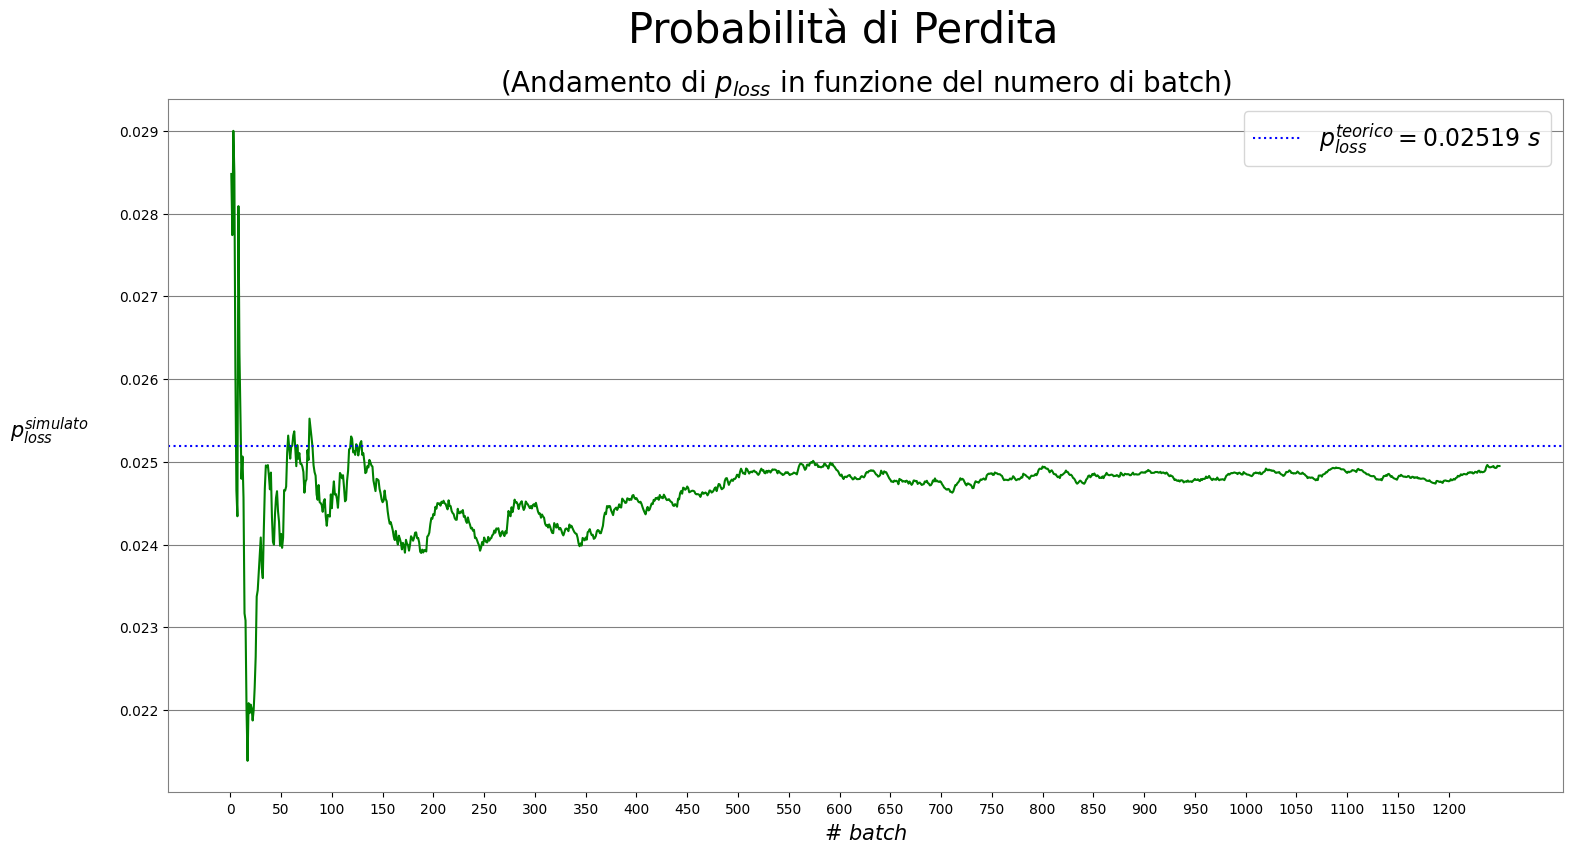

In [45]:
# This block is used to plot the loss probability's statistic in the infinite simulation.

def plot_infinite_ploss():

    df = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_123456789.csv")    
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        values = pd.DataFrame(cumMeanArray(df.loc[:,'ploss']))
        #values = df.loc[:,'ploss']
        
        mp.plot(df.loc[:,'batch'], values, color=plot_color)
        mp.suptitle("Probabilità di Perdita", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$p_{loss}$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$p_{loss}^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ batch$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df.loc[:,'batch'][0])
        end = int(df.loc[:,'batch'][len(df)-1])
        
        mp.axhline(y = ploss_theoretical, color = 'b', linestyle = ':', label = r"$p_{loss}^{teorico} = " + str(ploss_theoretical) + "\ s$")
        #mp.axhline(y = ploss_qos, color = 'r', linestyle = ':', label = r"$QoS = 0.05\ s$")
            
        mp.xticks(ticks=range(start-1, end, 50))
        
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ploss_infinite_batch.svg')
        
        mp.show()
                   
plot_infinite_ploss()

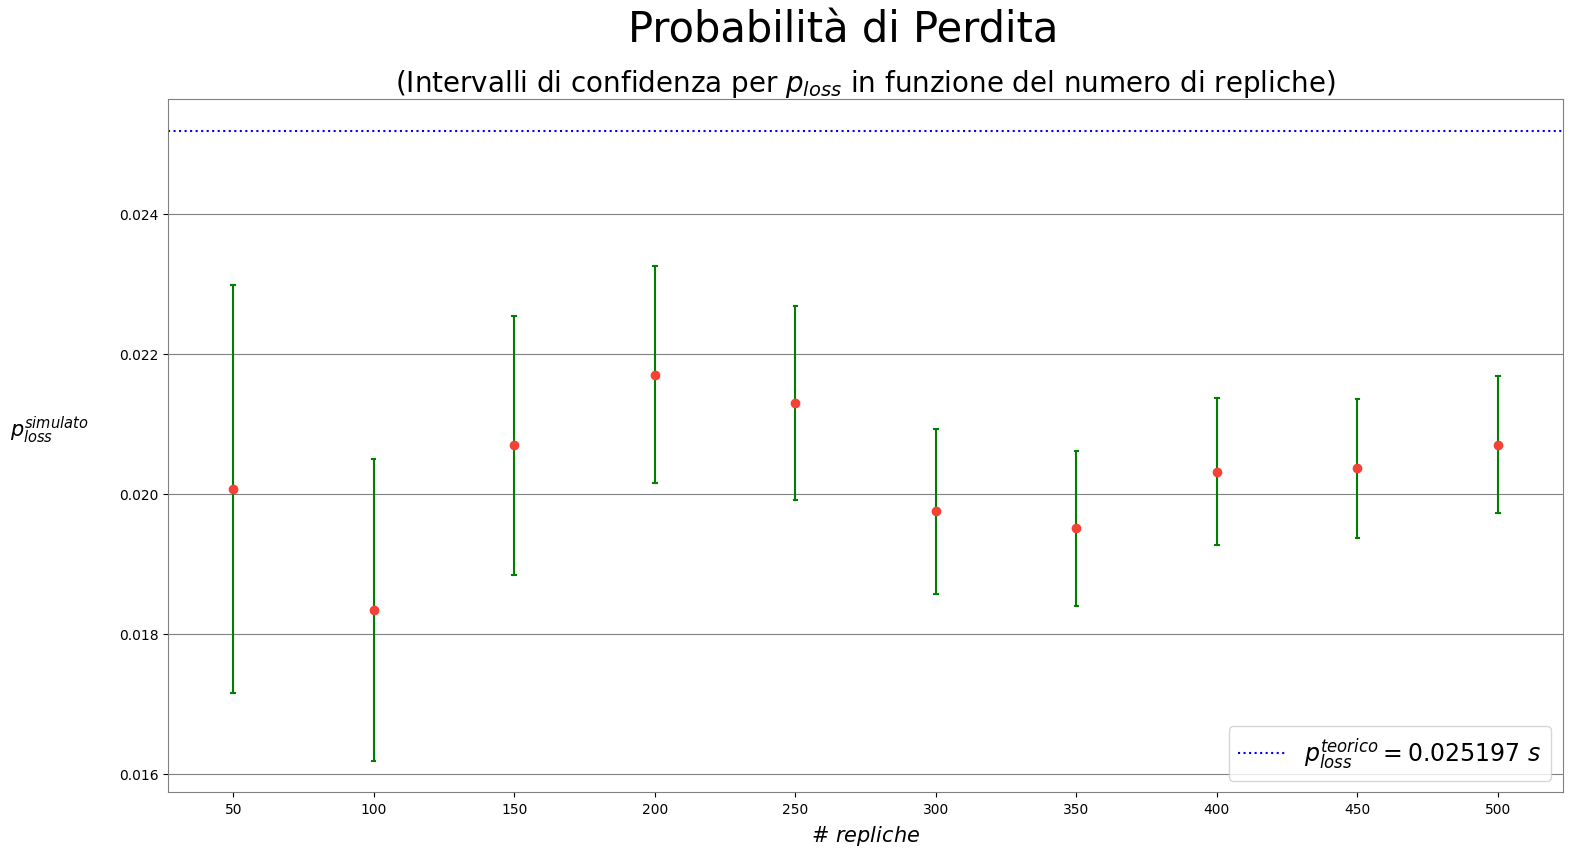

In [44]:
# This block is used to plot (and compute) the estimate intervals for the loss probability's statistic in the finite simulation.

df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_50.csv")
df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_100.csv") 
df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_150.csv")
df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_200.csv")
df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_250.csv") 
df6 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_300.csv")
df7 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_350.csv")
df8 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_400.csv") 
df9 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_450.csv")
df10 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/ploss_500.csv")

dfList = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

def plot_confidence_interval_ploss(z=1.96, color='#2187bb', horizontal_line_width=0.25):
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.suptitle("Probabilità di Perdita", color=label_color, fontsize=title_fontsize)
        mp.title("(Intervalli di confidenza per "+ r"$p_{loss}$" + " in funzione del numero di repliche)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$p_{loss}^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ repliche$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        #mp.axhline(y = ploss_qos, color = 'r', linestyle = ':', label = r"$QoS = 600\ s$")
        mp.axhline(y = ploss_theoretical, color = 'b', linestyle = ':', label = r"$p_{loss}^{teorico} = 0.025197\ s$")
        
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
        
    for i in range(len(dfList)):
        
        x = i+1
        values = dfList[i].loc[:,'ploss']
        
        mean = statistics.mean(values)
        stdev = statistics.stdev(values)
        confidence_interval = z * stdev / sqrt(len(values))

        left = x - horizontal_line_width / 20
        top = mean - confidence_interval
        right = x + horizontal_line_width / 20
        bottom = mean + confidence_interval

        mp.plot([x, x], [top, bottom], color=plot_color)
        mp.plot([left, right], [top, top], color=plot_color)
        mp.plot([left, right], [bottom, bottom], color=plot_color)
        mp.plot(x, mean, 'o', color='#f44336')

    mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ploss_finite_replicas.svg')
    mp.show()
     
plot_confidence_interval_ploss()

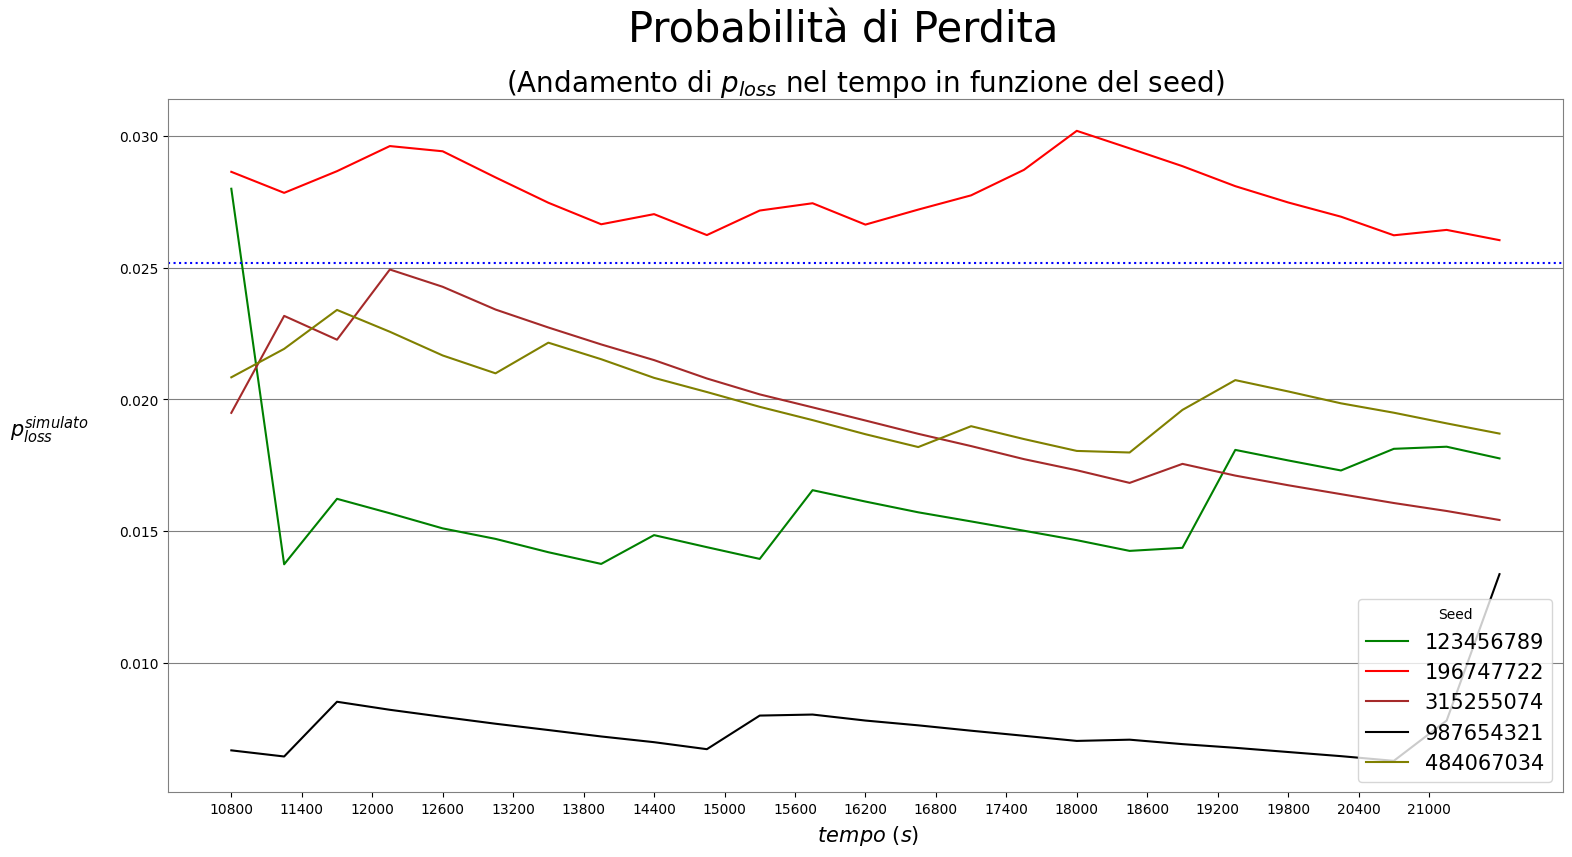

In [43]:
# This block is used to plot the loss probability's statistic by varying the seed in the finite simulation.

df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ploss_123456789.csv")
df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ploss_196747722.csv")
df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ploss_315255074.csv")
df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ploss_987654321.csv")
df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/ploss_484067034.csv")

def plot_seed_ploss():

    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.plot(df1.loc[:,'period'], df1.loc[:,'ploss'], color=plot_color, label = "123456789")
        mp.plot(df2.loc[:,'period'], df2.loc[:,'ploss'], color='red', label = "196747722")
        mp.plot(df3.loc[:,'period'], df3.loc[:,'ploss'], color='brown', label = "315255074")
        mp.plot(df4.loc[:,'period'], df4.loc[:,'ploss'], color="black", label = "987654321")
        mp.plot(df5.loc[:,'period'], df5.loc[:,'ploss'], color='olive', label = "484067034")
        
        mp.suptitle("Probabilità di Perdita", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$p_{loss}$" + " nel tempo in funzione del seed)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$p_{loss}^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\ tempo\ (s)$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df1.loc[:,'period'][0])
        end = int(df1.loc[:,'period'][len(df1)-1])
        
        mp.axhline(y = ploss_theoretical, color = 'b', linestyle = ':')#, label = r"$p_{loss}^{teorico} = 0.025197\ s$")
        
        mp.xticks(ticks=range(start, end, 600))
        
        legend = mp.legend(fontsize=15, title = "Seed")
        mp.setp(legend.get_texts(), color=label_color)
        
        if not EXTENDED:
            mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ploss_seed_finite.svg')
            
        mp.show()
                   
plot_seed_ploss()

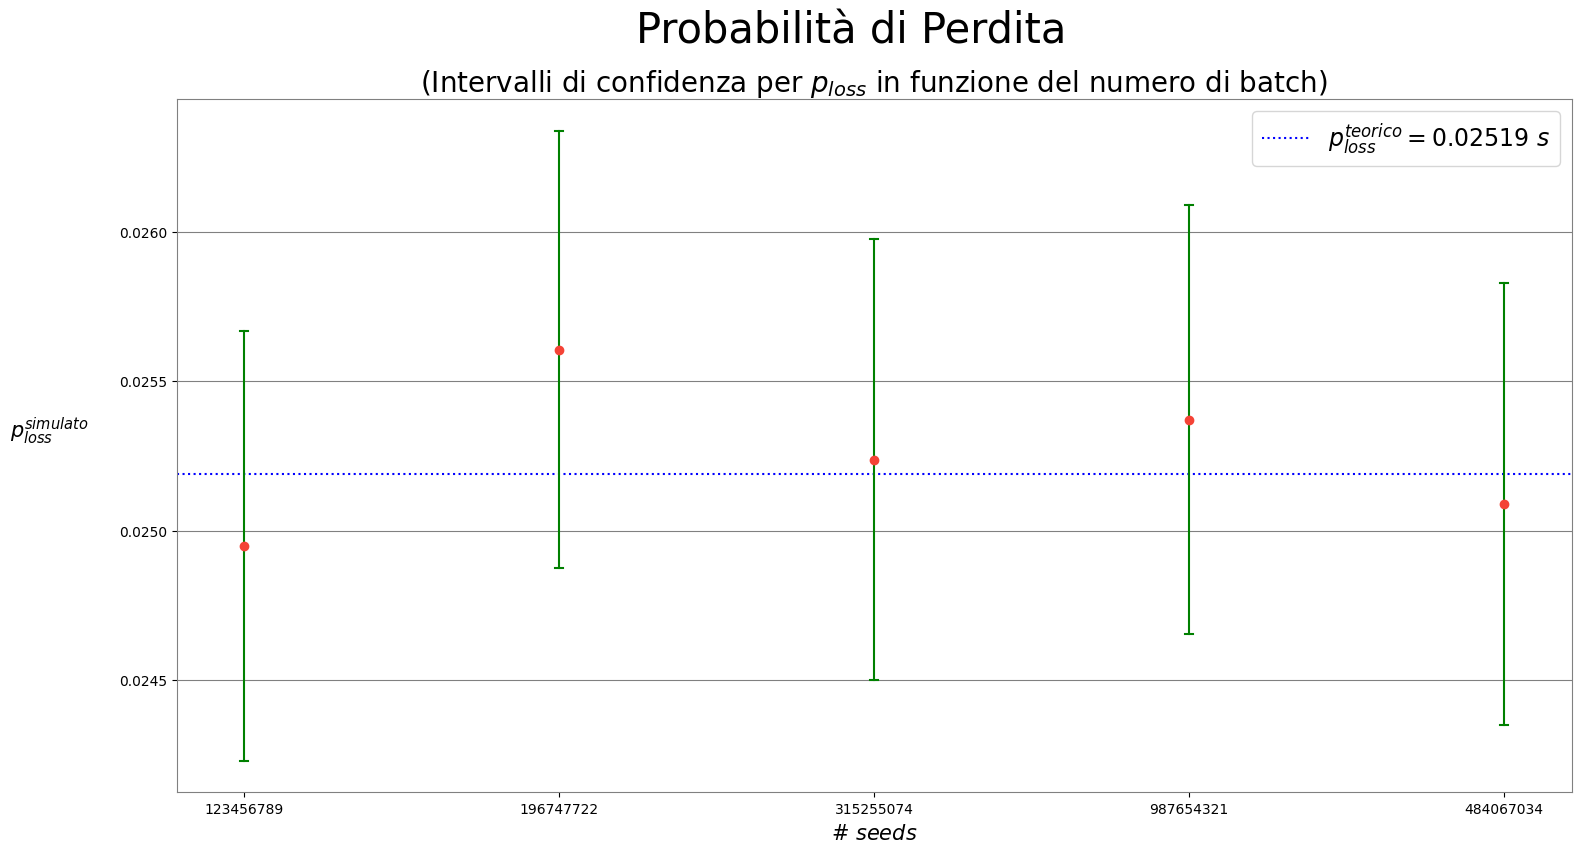

In [42]:
# This block is used to plot (and compute) the estimate intervals for the loss probability's statistic in the infinite simulation
# varying the seed.

df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_123456789.csv")
df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_196747722.csv")
df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_315255074.csv")
df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_987654321.csv")
df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_484067034.csv")

dfList = [df1, df2, df3, df4, df5]

def plot_confidence_interval_seed_ploss(z=1.96, color='#2187bb', horizontal_line_width=0.25):
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.suptitle("Probabilità di Perdita", color=label_color, fontsize=title_fontsize)
        mp.title("(Intervalli di confidenza per "+ r"$p_{loss}$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$p_{loss}^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ seeds$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        mp.axhline(y = ploss_theoretical, color = 'b', linestyle = ':', label = r"$p_{loss}^{teorico} = " + str(ploss_theoretical) + "\ s$")
            
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.xticks([1, 2, 3, 4, 5], [123456789, 196747722, 315255074, 987654321, 484067034])
        
    for i in range(len(dfList)):
        
        x = i+1
        values = dfList[i].loc[:,'ploss']
        
        mean = statistics.mean(values)
        stdev = statistics.stdev(values)
        confidence_interval = z * stdev / sqrt(len(values))

        left = x - horizontal_line_width / 20
        top = mean - confidence_interval
        right = x + horizontal_line_width / 20
        bottom = mean + confidence_interval

        mp.plot([x, x], [top, bottom], color=plot_color)
        mp.plot([left, right], [top, top], color=plot_color)
        mp.plot([left, right], [bottom, bottom], color=plot_color)
        mp.plot(x, mean, 'o', color='#f44336')

    mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ploss_seed_infinite.svg')
        
    mp.show()
     
plot_confidence_interval_seed_ploss()

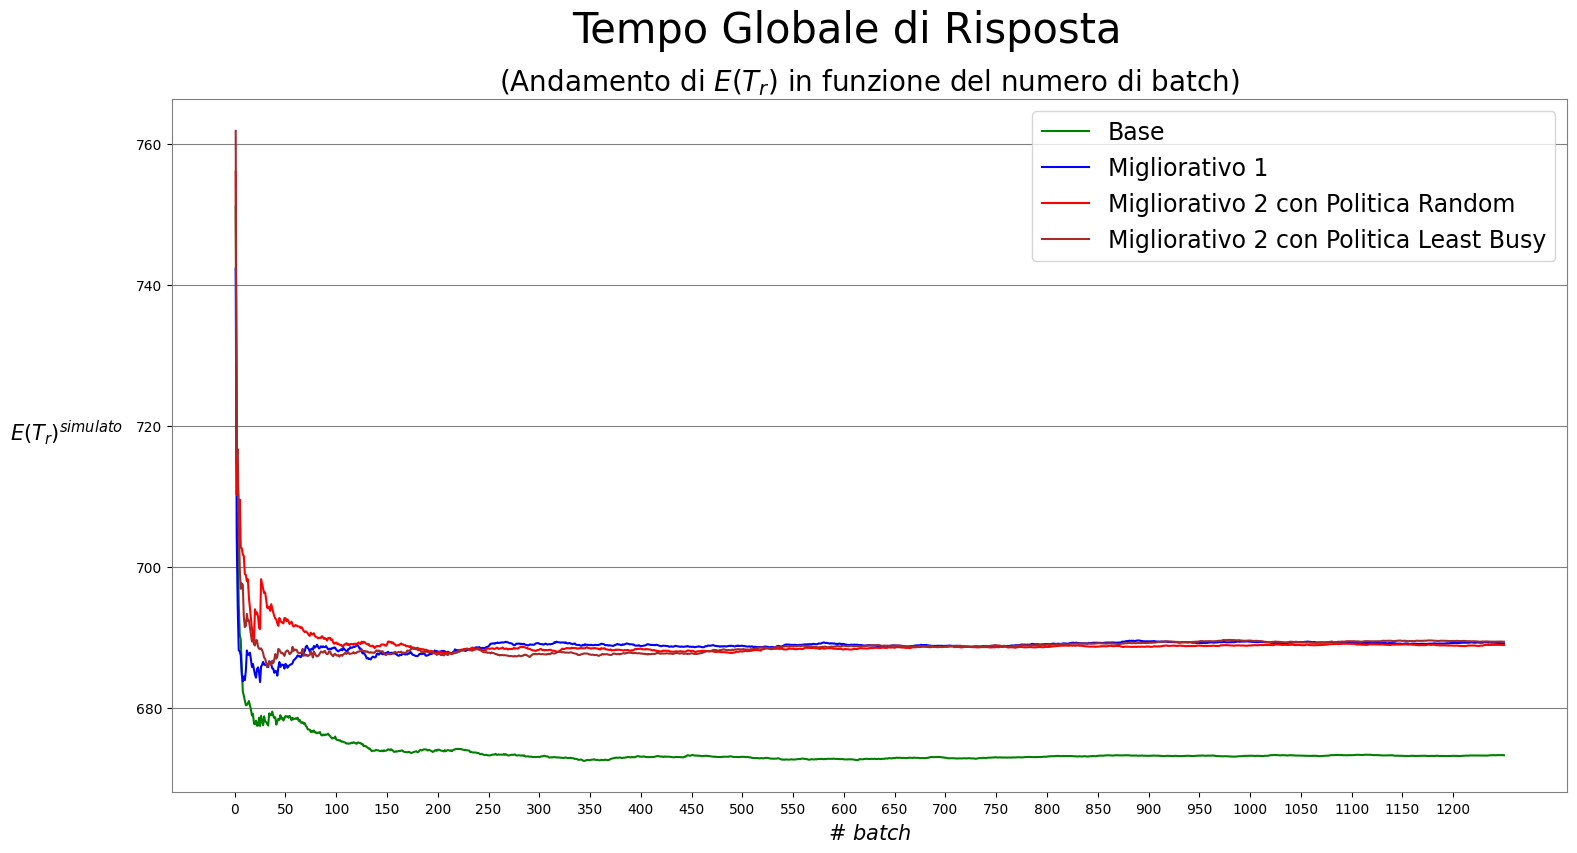

In [41]:
# This block is used to plot the grt's statistic in the infinite simulation for the extended model

def plot_ext_infinite_grt():

    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_200_123456789.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m21_123456789.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_grt_m22_123456789.csv")
        
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        values1 = pd.DataFrame(cumMeanArray(df1.loc[:,'grt']))
        values2 = pd.DataFrame(cumMeanArray(df2.loc[:,'grt']))
        values3 = pd.DataFrame(cumMeanArray(df3.loc[:,'grt']))
        values4 = pd.DataFrame(cumMeanArray(df4.loc[:,'grt']))
        
        mp.plot(df1.loc[:,'batch'], values1, color=plot_color, label="Base")
        mp.plot(df2.loc[:,'batch'], values2, color='blue', label="Migliorativo 1")
        mp.plot(df3.loc[:,'batch'], values3, color='red', label="Migliorativo 2 con Politica Random")
        mp.plot(df4.loc[:,'batch'], values4, color='brown', label="Migliorativo 2 con Politica Least Busy")
        
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$E(T_{r})$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ batch$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df1.loc[:,'batch'][0])
        end = int(df1.loc[:,'batch'][len(df1)-1])
        
        mp.xticks(ticks=range(start-1, end, 50))
        
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_grt_infinite_batch.svg')
        
        mp.show()

plot_ext_infinite_grt()

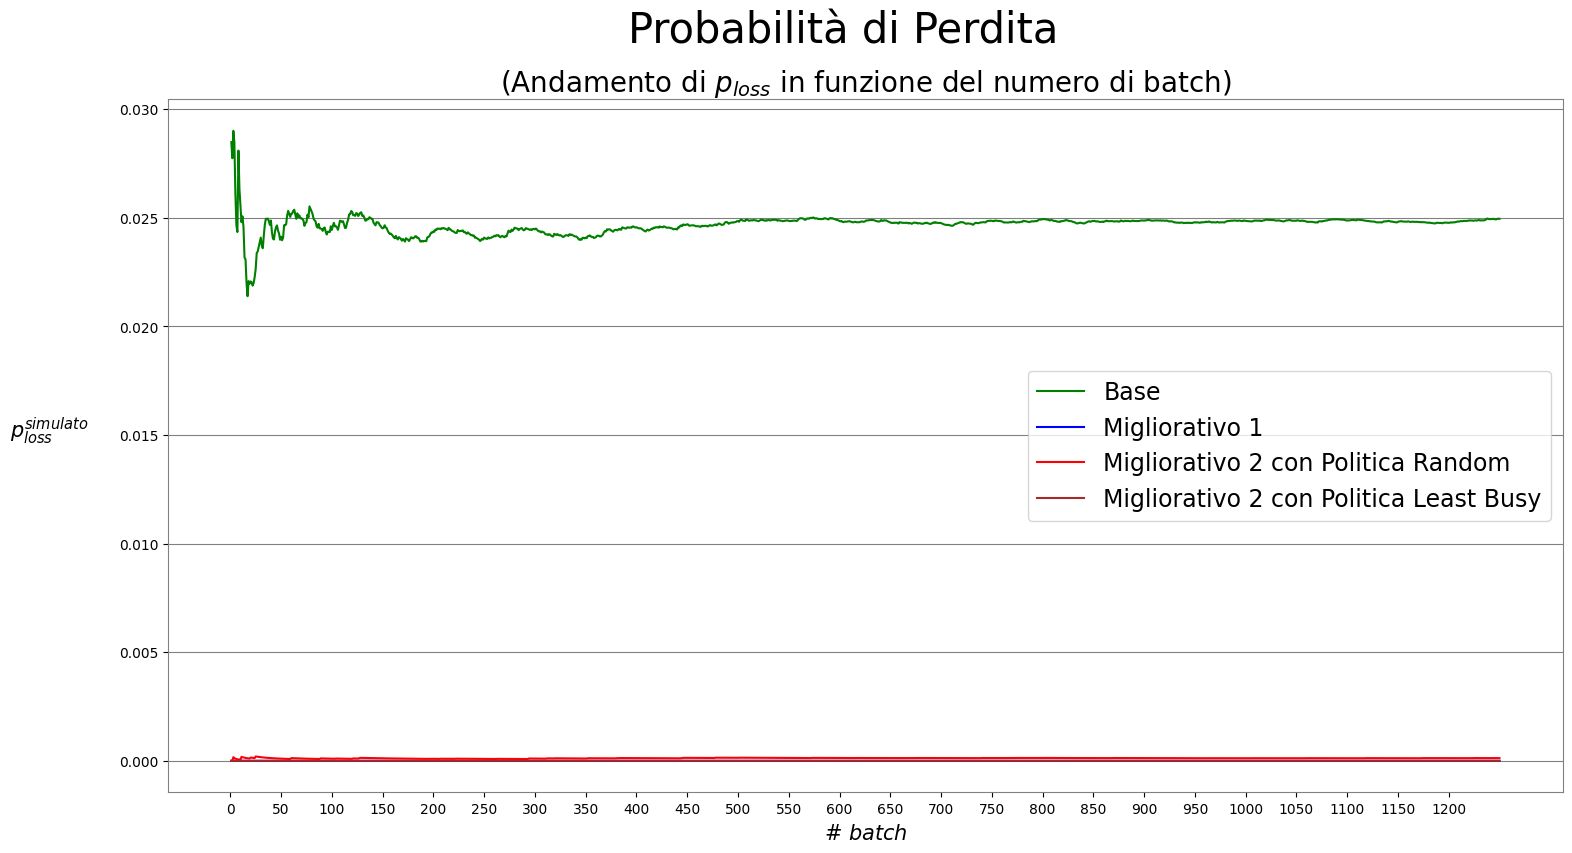

In [12]:
# This block is used to plot the loss probability's statistic in the infinite simulation for the extended model.

def plot_ext_infinite_ploss():

    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_150_123456789.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ploss_200_123456789.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_ploss_random_123456789.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/ext_ploss_rho_123456789.csv")
        
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        values1 = pd.DataFrame(cumMeanArray(df1.loc[:,'ploss']))
        values2 = pd.DataFrame(cumMeanArray(df2.loc[:,'ploss']))
        values3 = pd.DataFrame(cumMeanArray(df3.loc[:,'ploss']))
        values4 = pd.DataFrame(cumMeanArray(df4.loc[:,'ploss']))

        mp.plot(df1.loc[:,'batch'], values1, color=plot_color, label="Base")
        mp.plot(df2.loc[:,'batch'], values2, color='blue', label="Migliorativo 1")
        mp.plot(df3.loc[:,'batch'], values3, color='red', label="Migliorativo 2 con Politica Random")
        mp.plot(df4.loc[:,'batch'], values4, color='brown', label="Migliorativo 2 con Politica Least Busy")
            
        mp.suptitle("Probabilità di Perdita", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$p_{loss}$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$p_{loss}^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ batch$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df1.loc[:,'batch'][0])
        end = int(df1.loc[:,'batch'][len(df1)-1])
        
        mp.xticks(ticks=range(start-1, end, 50))
        
        legend = mp.legend(fontsize=legend_fontsize)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/ext_ploss_infinite_batch.svg')
        
        mp.show()
                   
#plot_ext_infinite_ploss()